+ 본질적인 문제는 컴퓨터가 우리 말을 이해하게 만드는 것이다.

+ 이번 장에서는 고전적인 기법 (딥러닝 이전)에 대해서 알아보고자 한다.

## 자연어처리란?
+ 우리가 평소에 쓰는 말을 자연어 natural language라고 한다. 따라서 자연어처리란 우리가 쓰는 말을 컴퓨터로 하여금 이해하게끔 만드는 기술 분야이다.

+ 자연어는 살아 있는 언어이며 그 안에는 '부드러움'이 있다. 그렇기에 딱딱한 컴퓨터에서 자연어를 이해시키는 것은 평범한 방법으로는 도달 불가능하다.

+ 현재 검색엔진이나 기계 번역과 같이 자연어처리 기술이 활용되고 있다.

### 단어의 의미
단어의 의미를 이해하는데는 크게 3가지 방법이 있다.
+ 시소러스를 활용 
+ 통계 기반 기법 
+ 추론 기반 기법 (word2vec)

## 시소러스

+ 단어의 의미를 나타내는 방법으로 가장 먼저 사람이 직접 단어의 의미를 정의하는 방식을 생각할 수 있다.

+ 시소러스란 유의어 사전을 뜻한다. 동의어나 뜻이 비슷한 단어 (유의어)가 한 그룹으로 분류되어 있다.

### WordNet

+ 자연어처리에서 각장 유명한 시소러스.

+ 이를 활용해서 '단어 네트워크'를 얻을 수 있다. (현재는 안쓴다)

### 시소러스의 문제점

+ 시대 변화에 대응하기 어렵다. 신조어가 나오면 그때그때 추가할 것인가?

+ 사람 쓰는 비용 문제. 예를 들어 영어 단어는 1000만 개가 넘는다. 이를 모두 사람이 정리하기엔 비용이 너무 크다.

+ 단어의 미묘한 차이를 표현할 수 없다.

## 통계 기반 기법

### 파이썬으로 말뭉치 처리

In [3]:
text = 'You say goodbye and I say hello.'

In [5]:
text = text.lower()
text = text.replace('.', ' .')
text

'you say goodbye and i say hello  .'

In [6]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '', '.']

In [7]:
# 딕셔너리 활용해서 id와 단어를 짝지어준다
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [8]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '', 7: '.'}

In [9]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '': 6, '.': 7}

In [10]:
# 이처럼 id나 단어를 기반으로 검색 가능
id_to_word[1]

'say'

In [11]:
word_to_id['hello']

5

In [12]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6, 7])

In [13]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}

    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
            
    corpus = [word_to_id[w] for w in words]
    
    return corpus, word_to_id, id_to_word

In [14]:
# 함수 활용하여 말뭉치 전처리
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

### 단어의 분산 표현

+ 색을 'RGB' 채널로 표현하듯 단어도 벡터로 표현할 수 있다.
+ 이를 자연어처리 분야에서는 'distributional representation'이라고 표현한다.

### 분포 가설

+ '단어의 의미는 주변 단어에 의해 형성된다' = 분포 가설 (distributional hypothesis)
+ 단어 자체에는 의미가 없고 맥락 (context)가 의미를 형성한다는 것.
+ window size = 맥락의 크기. 윈도우 사이즈가 1이면 좌우 한 단어씩만 본다는 것

### 동시발생 행렬 (co-occurence matrix)

+ 주변 단어를 본다 => 주변 단어를 센다
+ 이를 집계한 것이 동시발생 행렬

In [15]:
import sys
sys.path.append('..')
import numpy as np

In [16]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [17]:
print(corpus)

[0, 1, 2, 3, 4, 1, 5, 6]


In [18]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


'you'의 맥락으로써 동시에 발생하는 단어의 빈도를 나타내보면 다음과 같다.
+ you 0 / say 1 / goodbye 0 / and 0 / i 0 / hello 0 / . 0
+ 리를 벡터로 표현하면 [0, 1, 0, 0, 0, 0, 0]

계속해서 모든 단어에 대해서 정리를 한다음 합쳐보면 다음과 같은 행렬을 얻을 수 있다.

In [20]:
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]
])

In [21]:
# ID가 0인 단어의 벡터 표현
print(C[0])

[0 1 0 0 0 0 0]


In [31]:
#이와 같이 create_co_matrix라는 함수를 통해 동시발생 행렬을 만들어 낼 수 있다.

def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + 1
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    return co_matrix

### 벡터 간 유사도

+ 단어 벡터의 유사도를 나타낼 때는 cosine similarity를 사용한다.
+ 분자에는 벡터의 내적, 분모에는 각 벡터의 norm이 들어간다.
+ 직관적으로 풀어보면 '두 벡터가 가리키는 방향이 얼마나 비슷한가'이다.

In [24]:
def cos_similarity(x, y):
    nx = x / np.sqrt(np.sum(x**2))
    ny = y / np.sqrt(np.sum(y**2))
    return np.dot(nx, ny)
# 이렇게하면 모든 원소가 0인 벡터가 들어올 경우 오류가 발생

In [28]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / np.sqrt(np.sum(x**2) + eps)
    ny = y / np.sqrt(np.sum(y**2) + eps)
    return np.dot(nx, ny)

In [32]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]    # "i"의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067758832467


### 유사 단어의 랭킹 표시

In [33]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    
    if query not in word_to_id:
        print("%s(을)를 찾을 수 없습니다." % query)
        
    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(" %s %s" % (id_to_word[i], similarity[i]))
        
        count += 1
        if count >= top:
            return

In [34]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye 0.7071067758832467
 i 0.7071067758832467
 hello 0.7071067758832467
 say 0.0
 and 0.0


## 통계 기반 기법 개선하기

#### 상호정보량

+ 단순하게 발생 빈도로만 mapping하면 별로 중요하지 않은 the와 같은 관사가 car와 같이 의미를 갖는 단어와 동일하게 들어간다.
+ 이를 해결하기 위해 점별 상호정보량(PMI)를 사용한다.

<br>

+ PMI를 사용하면 "car"는 "the"보다 "drive"와 관련성이 강해진다.
+ 동시발생 횟수가 0일 경우를 고려하여 양의 상호정보략(PPMI)를 사용한다.

In [38]:
def ppmi(C, verbose=False, eps=1e-8):
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

In [39]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)


동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


#### 차원 감소

+ 중요한 정보를 최대한 유지하면서 벡터의 차원을 줄일 수 있다.
+ 차원을 감소시키는 방법은 여러가지이지만 여기서는 특잇값 분해 (singular value decomposition)을 활용한다.
+ SVD는 임의의 행렬을 세 행렬의 곱으로 분해한다. => X = U * S * V.transpose
+ U와 V는 직교행렬(orthogonal matrix)이고, 그 열 벡터는 직교한다. S는 대각행렬(대각성분 외에는 모두 0인 행렬)

행렬 U에서 여분의 열벡터를 깎아내어 원래의 행렬을 근사할 수 있다! (자세한 그림은 책 참조)


#### SVD에 의한 차원 감소

In [45]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [46]:
print(C[0]) # 동시발생 행렬

[0 1 0 0 0 0 0]


In [47]:
print(W[0]) # PPMI 행렬

[0.    1.807 0.    0.    0.    0.    0.   ]


In [48]:
print(U[0]) # SVD

[ 0.000e+00  3.409e-01 -1.205e-01 -3.886e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


In [49]:
# 여기서 이 밀집벡터의 차원을 감소시키려면 단순히 처음 두 원소를 꺼내면 된다.
print(U[0, :2])

[0.    0.341]


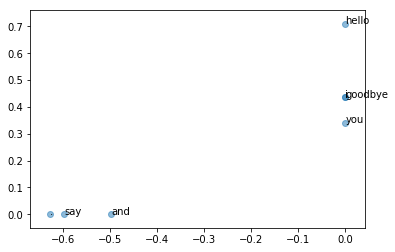

In [53]:
import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

### PTB 데이터셋

In [57]:
# 이제부터는 너무 작지도 너무 크지도 않은 적당한 크기의 말뭉치를 이용한다.
# PTB 데이터셋은 주어진 기법의 품질 측정용으로 많이 사용한다.

In [56]:
from dataset import ptb

In [58]:
corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

Done
말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [59]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

Done
동시발생 수 계산 ...
PPMI 계산 ...


C:\Users\Yang Saewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Yang Saewon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log2
  # Remove the CWD from sys.path while we load stuff.


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
calculating SVD ...

[query] you
 i 0.7973293662071228
 we 0.7471123933792114
 'd 0.531187891960144
 'll 0.5

## 정리

+ 시소러스 기반 기법에서는 단어들의 관련성을 사람이 수작업으로 진행.
+ 통계 기반 기법에서는 corpus로부터 단어의 의미를 자동으로 추출, 그 의미를 벡터로 표현한다.
+ 구체적으로는 co-ocurrence matrix, PPMI 행렬로 변환하고 SVD를 이용해 차원을 축소시켜 각 단어의 분산 표현을 만든다.
+ 이번 장에서는 말뭉치의 text를 다루기 쉽게 해주는 전처리 함수를 몇 개 구현해봤다. 코사인 유사도, most_similar 등등